In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import yaml
from Vec2 import Vec2
from sklearn.neighbors import NearestNeighbors

In [3]:
image = cv2.imread('maps/map2.pgm', 0)

with open('maps/map2.yaml', 'r') as file:
    map_yaml = yaml.safe_load(file)
    map_width = map_yaml["width"]
    map_height = map_yaml["height"]
    map_resolution = map_yaml["resolution"]
    map_origin = Vec2(map_yaml["origin"][0], map_yaml["origin"][1])

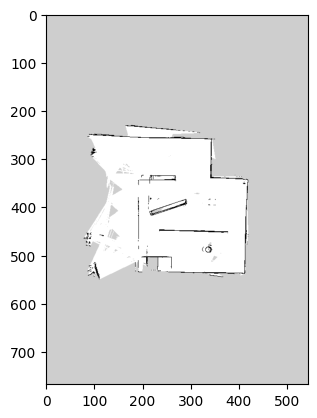

In [4]:
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
t, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
kernel = np.ones((10, 10), np.uint8)

# Perform dilation
eroded_image = cv2.erode(thresh, kernel, iterations=1)

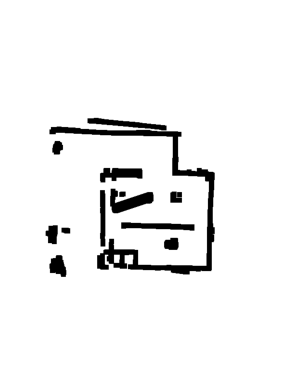

In [6]:
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')
plt.show()  

In [7]:
map_matrix = np.zeros(eroded_image.shape)
for i in range(eroded_image.shape[0]):
    for j in range(eroded_image.shape[1]):
        if (eroded_image[i][j] == False):
            # 1 is obstacles
            map_matrix[i][j]=1
        else:
            # 0 is open space
            map_matrix[i][j]=0

In [8]:
def world_to_pixel(self, world_vector):
    return Vec2(
        (world_vector.x - map_origin.x) / map_resolution,
        (world_vector.y - map_origin.y) / map_resolution
    )

def pixel_to_world(self, pixel_vector):
    return Vec2(
        pixel_vector.x * map_resolution + map_origin.x,
        pixel_vector.y * map_resolution + map_origin.y,
    )

In [9]:
pixel_min = (0,0)
pixel_max = (map_width, map_height)

num_points = 1000

points_x = np.random.randint(0, map_width, 1000)
points_y = np.random.randint(0, map_height, 1000)

points = np.column_stack((points_x, points_y))
print(points)

[[494 256]
 [216  66]
 [294 605]
 ...
 [ 45 625]
 [234 739]
 [474 654]]


In [10]:
points_are_valid = np.ones(num_points, dtype=bool)
for i in range(num_points):
    sp = points[i]
    points_are_valid[i] = map_matrix[sp[1], sp[0]] == 0

points = points[points_are_valid]


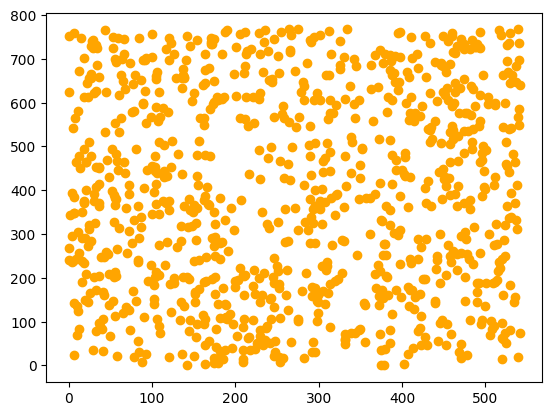

In [11]:
plt.scatter(points[:, 0], points[:, 1], color='orange')
plt.show()

In [22]:
def valid_adjacency(start, end):
    t = 0
    while t < 1:
        x = (end[0] - start[0]) * t + start[0]
        y = (end[1] - start[1]) * t + start[1]

        if map_width <= x or x < 0 or map_height <= y or y < 0:
            continue
        
        if map_matrix[y][x] == 1:
            return False

        t += 0.01

    return True

In [23]:
num_neighbours = 10
knn = NearestNeighbors(n_neighbors=num_neighbours + 1)
knn.fit(points)
_, neigbours_mat = knn.kneighbors(points)

graph = []
for i in range(len(neigbours_mat)):
    if i % 50 == 0:
        print(f"\rVertex {i}", end="", flush=True)
    neigbours = neigbours_mat[i, 1:]
    adjacencies = np.zeros(num_neighbours, dtype=bool)

    for j in range(len(neigbours)):
        # CHECK IF THE ADJACENCY IS VALID HERE
        # adjacencies[j] = valid_adjacency(points[i], points[j])
        adjacencies[j] = True

    graph.append(neigbours[adjacencies])

Vertex 900

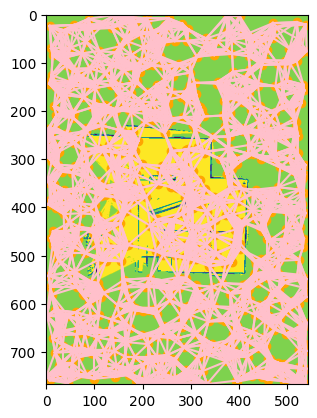

In [42]:

plt.scatter(points[:, 0], points[:, 1], color='orange')
for i in range(len(graph)):
    for n in graph[i]:
        line = np.array([points[i][0], points[n][0], points[i][1], points[n][1]])
        plt.plot(line[:2], line[2:4], color="pink")

plt.imshow(image)
plt.savefig("demo.pdf", format="pdf")